# Travail personnel 2 : Advection-diffusion en milieu poreux.
## Safae Ben Ayad & Maxime Langlet
###  Decembre 2018

## Brève introduction 

Pour ce travail, nous allons traiter le problème physique de la diffusion en milieu poreux. Nous avons l'équation qui décrit l'écoulement dans ce milieu-ci:
 
  $$\mathbf{u}=-\frac K \mu(\nabla P - \rho\,g\,\mathbf{1}_z)$$ (équation de Darcy) (1) 
 
 tel que: $K$ est la perméabilité du milieu, $\mu$ la viscosité du fluide, $g$ l'accélération dirigée en $\textbf{1}_z$, $\textbf{u} =(u,w)$ est la vitesse et $w$ est sa composante verticale.

et nous avons également l'équation qui nous donne l'évolution de la concentration dans le temps et dans le milieu
 
 $$\phi\frac{\partial C}{\partial t}=-\mathbf{u}.\nabla C + \phi D\nabla^2C$$ (équation d'advection-diffusion) (2)
 
où $\phi$ est la porosité du millieu et $D$ est le coefficient de diffusion du soluté.

C'est à partir de ces deux equations qu'on peut étudier la stabilité des solutions chimiques dans le milieux poreux.
Ici, nous allons travailler dans un milieu à 2 dimensions (direction des axes x et z).

Après linéarisation des équations précedentes, on obtient les équations suivantes:

$$
 \left(\frac{\partial^2}{\partial z^2}-k^2\right)w' = -k^2 c'  $$
$$\frac{\partial c'}{\partial t}-\frac{1}{Ra}\left(\frac{\partial^2}{\partial z^2}-k^2\right)c'=-\frac{\partial C_0}{\partial z}w' \\
$$

Les équations ci-dessus font intervenir les perturbations $c'$ et $w'$ autour de l'état de base qui est $(0, C_0(z,t))$ où $w=0$ car le fluide est au repos et $C_0$ est la concentration de base.

## Question 1

Nous voullons montrer que par un changement de variables, les équations 

$$
 \left(\frac{\partial^2}{\partial z^2}-k^2\right)w' = -k^2 c'  $$
$$\frac{\partial c'}{\partial t}-\frac{1}{R_a}\left(\frac{\partial^2}{\partial z^2}-k^2\right)c'=-\frac{\partial C_0}{\partial z}w' \\
$$ 

peuvent se réecrire comme étant 

$$
\left(\frac{Ra}{4t}\frac{\partial^2}{\partial \xi^2}-k^2\right)w = -k^2 c\\
\frac{\partial c}{\partial t}-\frac{1}{t}\left(\frac{1}{4}\frac{\partial^2}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial}{\partial\xi}-\frac{k^2 t}{Ra}\right)c=\sqrt{\frac{Ra}{\pi t}}e^{-\xi^2}w.
$$

Soient les fonctions $c'(z,t)$ et $w'(z,t)$, nous allons appeller $c(\xi, t^*)$ et $w(\xi, t^*)$ les fonctiones qui dependent des nouvelles variables $t'$ et $\xi$. 
Définissons le changement de variables:

$$ 
\left\{
    \begin{array}
          \ t &= t^* \\
          \xi &= z \sqrt{\frac{R_a}{4t}} 
    \end{array} 
\right. $$
    
Remarquons que $\xi$ dépend de $t$, la changement de variable fera donc intervenir ce terme.

Pour faire ce changement de variable, nous allons utiliser la $ \textit{chain rule}$ terme par terme.

Commençons par:

$ 
\begin{align}
     \frac{\partial w'}{\partial z} = & \frac{\partial w}{\partial \xi} \frac{\partial \xi}{\partial z} +   \frac{\partial w}{\partial t^*} \frac{\partial t^*}{\partial z} \\
     = & \frac{\partial w}{\partial \xi} \frac{\partial \xi}{\partial z} \\
\end{align} 
$ $\underline{Remarque}: $ La derivée de $t^*$ par rapport à $z$ est nulle

Donc la dérivée seconde est :

$ 
\begin{align}
     \frac{\partial^2 w'}{\partial z^2} = & \frac{\partial}{\partial z}
     \left( \frac{\partial w}{\partial\xi}\frac{\partial \xi}{\partial z} \right) \\
     = & \frac{\partial^2 w}{\partial \xi^2} \left(\frac{\partial \xi}{\partial z} \right) ^2 + \frac{\partial w}{\partial \xi} \frac{\partial^2 \xi}{\partial z^2} \\
     = & \frac{\partial^2 w}{\partial \xi^2} \left(\frac{\partial \xi}{\partial z} \right) ^2 + 0 \\
     = & \frac{\partial^2 w}{\partial \xi^2} \frac{R_a}{4t} 
\end{align} 
$


Calculons à présent le premier terme dans la 2° expression;

$ 
\begin{align}
     \frac{\partial c'}{\partial t} = & \frac{\partial c}{\partial t^*}\frac{\partial t^*}{\partial t} +   \frac{\partial c}{\partial \xi} \frac{\partial \xi}{\partial t} \\
     = & \frac{\partial c}{\partial t^*} \cdot 1 + \frac{\partial c}{\partial \xi} \frac{\partial \xi}{\partial t} \\
     = & \frac{\partial c}{\partial t^*} + \frac{\partial c}{\partial \xi} \left( \frac{-z}{2}\right) \sqrt{\frac{R_a}{4t^3}}
\end{align} 
$

Notons que $t^*$ étant égale à $t$, par légèreté d'écriture nous allons utiliser t seulement dans nos expressions.

Le 3ème terme de l'équation ressemble fortement au premier terme pour lequels nous avons fait le calcul un peu plus au-dessus:

$
\begin{align}
     \frac{\partial c'}{\partial z} & = \frac{\partial c}{\partial \xi} \frac{\partial \xi}{\partial z} + 0 \\
     \Rightarrow \frac{\partial^2 c'}{\partial z^2} & = \frac{\partial^2 c}{\partial \xi^2} \left( \sqrt{\frac{R_a}{4t}} \right)^2 = \frac{\partial^2 c}{\partial \xi^2} \frac{R_a}{4t} \\
\end{align} 
$

Pour le dernier terme, nous avons:

$
\begin{align}
     \frac{\partial C_0(z,t)}{\partial z} = & \frac{\partial C_0}{\partial \xi}\frac{\partial \xi}{\partial z} +   \frac{\partial C_0}{\partial t^*} \frac{\partial t^*}{\partial z} \\
\end{align} 
$

Sachant que la dérivée de $t^*$ par rapport à $z$ étant nulle, nous avons :

$
\begin{align}
     \frac{\partial C_0(z,t)}{\partial z} = & \frac{\partial C_0(\xi, t)}{\partial\xi}\frac{\partial\xi}{\partial z}\\
     = & \frac{\partial C_0(\xi, t)}{\partial \xi} \sqrt{\frac{R_a}{4t}}\\
\end{align} 
$

Nous inserons toutes les dérivées que nous avons calculé dans les expressions données dans l'introduction et nous obtenons:

• Pour la première

$$ \frac{\partial^2 w}{\partial \xi^2} \frac{R_a}{4t} - k^2 w = -k^2 c \iff  \left(\frac{R_a}{4t}\frac{\partial^2}{\partial \xi^2}-k^2\right)w = -k^2 c$$

• Pour la deuxième équation 

$$
\begin{align}
    & \frac{\partial c}{\partial t} - \frac{z}{2t}\sqrt{\frac{R_a}{4t}}\frac{\partial c}{\partial \xi} 
    - \frac{1}{R_a} \left( \frac{\partial^2 }{\partial \xi^2} \frac{R_a}{4t} - k^2 \right) c  
    = - \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}} w \\
    \Rightarrow  & \frac{\partial c}{\partial t} - \frac{\xi}{2t} \frac{\partial c}{\partial \xi} - \frac{\partial^2 c}{\partial \xi^2} \frac{1}{4t} + \frac{k^2 c}{R_a} 
    = - \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}} w \\
\Rightarrow  & \frac{\partial c }{\partial t} - \left( \frac{\partial^2 }{\partial \xi^2} \frac{1}{4t} + \frac{\xi}{2t} \frac{\partial }{\partial \xi} - \frac{k^2 }{R_a} \right) c 
    = - \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}} w \\
    \Rightarrow  & \frac{\partial c }{\partial t} - \frac{1}{t}\left( \frac{1}{4} \frac{\partial^2 }{\partial \xi^2}  + \frac{\xi}{2} \frac{\partial }{\partial \xi} - \frac{k^2 t}{R_a} \right) c 
    = - \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}} w
\end{align}
$$

Sachant que 

$$\begin{align}
     \frac{\partial C_0}{\partial z} & = - \frac{2}{\sqrt{\pi}}\sqrt{\frac{R_a}{4t}}e^{-\left(z\sqrt{\frac{R_a}{4t}}\right)^2} \\
     & = - \frac{2}{\sqrt{\pi}}\sqrt{\frac{R_a}{4t}}e^{-\xi^2} \\
     & = - \sqrt{\frac{R_a}{\pi t}}e^{-\xi^2} \\
\end{align}
$$ 

et par la fomule calculée qui dit 

$$ \frac{\partial C_0}{\partial z} = \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}},$$ 

on a: 

$$ \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}} = - \sqrt{\frac{R_a}{\pi t}}e^{-\xi^2} $$

le terme de droite de la deuxième équation devient alors: 

$$ - \frac{\partial C_0}{\partial \xi} \sqrt{\frac{R_a}{4t}}w = + \sqrt{\frac{R_a}{\pi t}} e^{-\xi^2}w $$

Finalement la 2° équation devient dans les nouvelles variables: 

$$ \frac{\partial c }{\partial t} - \frac{1}{t}\left( \frac{1}{4} \frac{\partial^2 }{\partial \xi^2}  + \frac{\xi}{2} \frac{\partial }{\partial \xi} - \frac{k^2 t}{R_a} \right) c 
    = \sqrt{\frac{R_a}{\pi t}} e^{-\xi^2} w $$

## Question 2   

Nous avons pour commencer la variable discrétisée $\xi$,
$$\xi_m=m\Delta$$
où $m=0,...,100$.

On a alors $c_m=c(\xi_m,t)$ et $w_m=w(\xi_m,t)$.

En utilisant les différences finies d'ordre 2, on peut réecrire les opérateurs suivants sous forme matricielle, 

$$L_{i,j}=\left( \frac{R_a}{4t}\frac{\partial^2}{\partial \xi^2}-k^2\right)_{i,j}$$

$$M_{i,j}=\frac{1}{t}\left( \frac{1}{4}\frac{\partial^2}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial}{\partial \xi}-\frac{k^2t}{R_a}\right)_{i,j}$$

Commençons avec $L_{i,j}$ : 

Posons la fonction $u_m=c_m$ et/ou $u_m=w_m$. En appliquant l'opérateur sur $u_m$, il est possible d'exprimer les dérivées en différences finies. Comme nous évaluerons le dérivées d'ordre 2 dans ce travail, nous trouvons comme différence centrale finie : 
$$\frac{\partial^2 u}{\partial \xi^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta^2}$$

(coéficients donné dans https://en.wikipedia.org/wiki/Finite_difference_coefficient)

De même, pour la $\textit{forward and backward finite difference}$, nous avons :

$$
\begin{align*}
\frac{\partial^2 u}{\partial \xi^2} &=\frac{2u_{i}-5u_{i+1}+4u_{i+2}-u_{i+3}}{\Delta^2}\\
\frac{\partial^2 u}{\partial \xi^2} &=\frac{2u_{i}-5u_{i-1}+4u_{i-2}-u_{i-3}}{\Delta^2}\\
\end{align*}
$$  


Revenons à notre opérateur, nous voyons ensuite que nous multiplions cette dérivée seconde par un certain paramètre et qu'ensuite nous soustrayons par un autre paramètre. On a de ce fait l'expression suivante $\forall$ $i$ $\in$ $[1,99]$ :

$$L_{i,j}= \frac{R_a}{4t} \left( \frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta^2} \right) -k^2u_i$$

On remarque que pour chaque $i$, on a 3 coefficients. À partir de ceci on peut construire une matrice pour le premier terme de $L_{i,j}$, et le deuxième terme est alors simplement le terme $k^2$ multiplié par la matrice identitée. 

On aura alors : 

$$L_{i,j}= \frac{R_a}{4t\Delta^2}
\quad
\begin{pmatrix} 
 &.  \\
 &   & .\\
 &   &   & .\\
.& . & 0 & 1 & -2 & 1  & 0 & . & . & . &.  \\
.& . & . & 0 & 1  & -2 & 1 & 0 & . & . &. \\
.& . & . & . & 0  & 1  & -2& 1 & 0 & . &. \\
 &   &   &   &    &    &   & . &   &   & \\
 &   &   &   &    &    &   &   & . &   & \\
 &   &   &   &    &    &   &   &   &.  & \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_0\\
u_1\\
.\\
.\\
.\\
\end{pmatrix}
-k^2 1\!\!1
\begin{pmatrix}
u_0\\
u_1\\
.\\
.\\
.\\
\end{pmatrix}$$

où $1\!\!1$ est la matrice identité.

Il reste à déterminer les coéficients de la première et dernière ligne, pour ceci nous utiliserons les conditions aux bords donné dans l'énoncé. Nous savons que $u(\xi=0)=u(\xi=\infty)=0$, donc nous pouvons supprimer la première et dernière colonne, et première et dernière ligne de notre matrice car celles-ci n'influencent pas le calcul de l'opérateur. Plus précisement, on a l'expression suivante en tennant compte des conditions aux bords : 

$$L_{i,j}= \frac{R_a}{4t\Delta^2}
\quad
\begin{pmatrix} 
 0 & 0  & 0 & 0 & 0 & . &. &. &0 \\
 0 & -2 & 1 & 0 & 0 & . &. &. &0  \\
 0 & 1 & -2 & 1 & 0 &. &. &. &0 \\
 . &   &    & . & & & & & .\\
 . &   &    &   & . & & & &. \\
 . &   &    &   &   & . & & & .\\
 0 & . &  . & . & 0 & 1 & -2 & 1 & 0 \\
 0 & . & .  & . & 0 & 0 & 1 & -2 & 0 \\
 0 & . & .  & . & 0 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_0\\
u_1\\
.\\
.\\
.\\
u_{100}
\end{pmatrix}
-k^2 1\!\!1
\begin{pmatrix}
u_0\\
u_1\\
.\\
.\\
.\\
u_{100}
\end{pmatrix}$$

On peut dés lors supprimer la première et dernière ligne, de même pour les colonnes; on se retrouve avec une matrice $M_{99x99}$. Nous supprimons aussi de l'expression les composantes $u_0$ et $u_{100}$ comme ceux-ci sont nuls tout les deux. Dés lors, $L_{ij}$ à la forme : 

$$L_{i,j}= \frac{R_a}{4t\Delta^2}
\quad
\begin{pmatrix} 
 -2 & 1  & 0 & 0 & . & . & .\\
 1  & -2 & 1 & 0 & . & . & .\\
 .  &    & . &   &   &   & .\\
 .  &    &   & . &   &   & .\\
 .  &    &   &   & . &   & .\\
 .  & .  & . & 0 & 1 & -2 & 1 \\
 .  & .  & . & 0 & 0 & 1  & -2 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
.\\
u_{99}
\end{pmatrix}
-k^2 1\!\!1
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
.\\
u_{99}
\end{pmatrix}$$

Effectuons le même procédé pour l'opérateur $M_{i,j}$ :
$$M_{i,j}=\frac{1}{t}\left( \frac{1}{4}\frac{\partial^2}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial}{\partial \xi}-\frac{k^2t}{R_a}\right)_{i,j}$$

Nous avons déja exprimer les dérivées secondes en différence finie. Regardons les dérivées premières. On a en différence centrale,"forward" et "backward" les expressions suivante :
\begin{align*}
\frac{\partial u_C}{\partial \xi} &= \frac{u_{i+1}-u_{i-1}}{2\Delta}\\
\frac{\partial u_F}{\partial \xi} &= \frac{-\frac{3}{2}u_{i}+2u_{i+1}-\frac{1}{2}u_{i+2}}{\Delta}\\
\frac{\partial u_B}{\partial \xi} &= \frac{\frac{3}{2}u_{i}-2u_{i-1}+\frac{1}{2}u_{i-2}}{\Delta}\\
\end{align*}

où $u_C$, $u_F$ et $u_B$ représente simplement les dérivées premières en différence finies centrale, "frontward" et "backward" respectivement. 

De la même manière que précédemment, vu les conditions aux bords la première colonne et la dernière colonne de la matrice. On a ;

$$\frac{\partial u}{\partial \xi}= \frac{1}{\Delta}
\quad
\begin{pmatrix} 
 0 & 0    & 0   & .   & . & . &. & .& 0\\
 0 & 0    & \frac{1}{2} & 0   & . & . &. & .& 0\\
 0 & -\frac{1}{2} & 0   & \frac{1}{2} & 0 & . &. & .& 0\\
 . &      & .   &     & . &  &  & & .\\
 . &      &     & .   &   & . &  & & .\\
 . &      &     &     & . &   & . & & .\\
 0 & .    & .   & .   & 0 & -\frac{1}{2} & 0    & \frac{1}{2} & 0\\ 
 0 & .    & .   & .   & . & 0    & -\frac{1}{2} & 0   & 0\\
 0 & .    & .   & .   & . & .    & 0    & 0   & 0
\end{pmatrix}
\quad
\begin{pmatrix}
u_0\\
.\\
.\\
.\\
u_{100}
\end{pmatrix}$$


On remarque que la matrice des dérivées secondes est la même que pour l'opérateur $L_{ij}$, avec comme seul modification le paramètres multiplicatifs devant la matrice est différent.
En sommant les résultats trouvé, on obtient :

$$M_{i,j}= \frac{1}{4t\Delta^2}
\quad
\begin{pmatrix} 
 0 & 0  & 0  & 0 & . & . & . & 0\\
 0 & -2 & 1  & 0 & . & . & . & 0\\
 0 & 1  & -2 & 1 & . & . & . & 0\\
 . &   &   & . & & & & .\\
 . &   &   &    & . & & & .\\
 . &   &   &    &   & . & & . \\ 
 0 & . & . & .  & 0  & 1 & -2 & 0 \\
 0 & . & . & .  & 0  & 0 & 0  & 0 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_0\\
.\\
.\\
.\\
u_{100}
\end{pmatrix}
+\frac{\xi}{2t\Delta}
\quad
\begin{pmatrix} 
 0 & 0    & 0   & 0   & 0 & . &. & .& 0\\
 0 & 0    & \frac{1}{2} & 0   & 0 & . &. & .& 0\\
 0 & -\frac{1}{2} & 0   & \frac{1}{2} & 0 & . &. & .& 0\\
 . &      & .   &     & . &  &  & & .\\
 . &      &     & .   &   & . &  & & .\\
 . &      &     &     & . &   & . & & .\\
 0 & .    & .   & .   & 0 & -\frac{1}{2} & 0    & \frac{1}{2} & 0\\ 
 0 & .    & .   & .   & 0 & 0    & -\frac{1}{2} & 0   & 0\\
 0 & .    & .   & .   & 0 & 0    & 0    & 0   & 0
\end{pmatrix}
\quad
\begin{pmatrix}
u_0\\
u_1\\
.\\
.\\
u_{100}
\end{pmatrix}
-\frac{k^2}{R_a} 1\!\!1
\begin{pmatrix}
u_0\\
u_1\\
.\\
.\\
u_{100}
\end{pmatrix}$$

Pour les même raisons que précédemment, on peut supprimer la premiere et dernière ligne et colonne. Et en simplifiant avec l'expression de $\xi = m\Delta$ on trouve : 

$$M_{i,j}= \frac{1}{4t\Delta^2}
\quad
\begin{pmatrix} 
-2 & 1  & 0 & .& . &. & 0\\
 1 & -2 & 1 & .& . &. & 0\\
 . &    & . &  &   &  & .\\
 . &    &   & .&   &  & .\\
 . &    &   &  & . &  & .\\
 0 & . & . & . & 1 & -2 & 1 \\
 0 & . & . & . & 0 & 1 & -2 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}
+\frac{m}{2t}
\quad
\begin{pmatrix} 
 0 & \frac{1}{2} & 0 & . & . & . & 0\\
 -\frac{1}{2} & 0 & \frac{1}{2} & . & . & . & 0\\
 . & . &   & .  &  & & . \\
 . &   & . &   & . & & . \\
 . &   &   & . &   & . & .\\
 0 & . & . & . & -\frac{1}{2} & 0 & \frac{1}{2} \\ 
 0 & . & . & . & 0 & -\frac{1}{2} & 0 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}
-\frac{k^2}{R_a} 1\!\!1
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}$$

## Question 3

Nous allons vérifier que la fonction $f(\xi)=e^{-\xi^2}h(\xi)$ est bien fonction propre de l'opérateur
$$Hf=\frac{1}{4}\frac{\partial^2 f}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial f}{\partial \xi}=\alpha f$$

Pour ce faire, on a l'information que $h$ est solution de l'équation de Hermite $h''-2\xi h'=-2\lambda h$.

Remplaçons $f$ et résolvons :
\begin{align*}
Hf &= \frac{1}{4}\frac{\partial^2 \big(e^{-\xi^2}h(\xi)\big)}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial \big(e^{-\xi^2}h(\xi)\big)}{\partial \xi^2}\\
   &= \frac{1}{4} \frac{\partial}{\partial \xi}\Big[(-2\xi) e^{-\xi^2}h(\xi) + e^{-\xi^2}h'(\xi)\Big] + \frac{\xi}{4}\Big[-4\xi e^{-\xi^2}h(\xi)+2e^{-\xi^2}h'(\xi)\Big]\\
   &= \frac{1}{4}\Big[-2e^{-\xi^2}h(\xi)+4\xi^2e^{-\xi^2}h(\xi)-2\xi e^{-\xi^2}h'(\xi) -2\xi e^{-\xi^2}h'(\xi)+e^{-\xi^2}h''(\xi)\Big]+\frac{\xi}{4}\Big[-4\xi e^{-\xi^2}h(\xi)+2e^{-\xi^2}h'(\xi)\Big]\\
   &=\frac{e^{-\xi^2}}{4}\Big[h''(\xi)-2\xi h'(\xi)-2h(\xi)\Big]\\
   &=\frac{e^{-\xi^2}}{4}\Big[-2\lambda h(\xi)-2h(\xi)\Big]\\
   &=-\frac{e^{-\xi^2}}{2}(\lambda+1)h(\xi)\\
   &=-\frac{(\lambda+1)}{2}f(\xi)\\
   &=\alpha f(\xi)\\
\end{align*}

On remarque que $f$ est bien fonction propre de l'opérateur, et $\alpha=\frac{-(\lambda+1)}{2}$. 

Maintenant, nous allons utiliser les valeurs aux bords pour trouver les valeurs admissibles de $\alpha$. On sait que $f(\xi_m=0)=f(\xi_m=\infty)=0$, ceci implique que notre fonction $f$ est bornée, celle-ci ne divergera pas en l'infini ou en $0$. De plus, d'après les propriétés de l'équation différentielle de Hermite, on a que $\lambda$ est un entier non-négatif impaire (pour plus de détails https://en.wikipedia.org/wiki/Hermite_polynomials). 

Ceci implique que $\alpha$ est un entier négatif. Vérifions cette affirmations en calculant numériquement les valeurs propres de l'opérateur H (ex 4).

## Question 4 

Nous remarquons que l'expression de $H$ est très proche de celle de $M_{ij}$, inspirons nous de notre réponse précédente pour en déduire $H$. On a ;
$$H_{i,j} \textbf{u}= \frac{1}{4\Delta^2}
\quad
\begin{pmatrix} 
-2 & 1  & 0 & . & . & & 0\\
 1 & -2 & 1 & .& . &. & 0\\
 . &    & . &  &   &  & .\\
 . &    &   & .&   &  & .\\
 . &    &   &  & . &  & .\\
 0 & . & . & . & 1 & -2 & 1 \\
 0 & . & . & . & 0 & 1 & -2 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}
+\frac{m}{2}
\quad
\begin{pmatrix} 
 0 & \frac{1}{2} & 0 & . & . & . & 0\\
 -\frac{1}{2} & 0 & \frac{1}{2} & . & . & . & 0\\
 . & . &   & .  &  & & . \\
 . &   & . &   & . & & . \\
 . &   &   & . &   & . & .\\
 0 & . & . & . & -\frac{1}{2} & 0 & \frac{1}{2} \\ 
 0 & . & . & . & 0 & -\frac{1}{2} & 0 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}$$

Comme $m$ est le nombre de discrétisation de notre variable, en la distribuant sur la matrice de $\frac{\partial}{\partial \xi}$, on multiplie chaque ligne par un facteur grandissant a interval régulier. On a alors :


$$H_{i,j} \textbf{u}= \frac{1}{4\Delta^2}
\quad
\begin{pmatrix} 
 -2 & 1  & 0 & .& . &. & 0\\
 1 & -2 & 1 & .& . &. & 0\\
 . &    & . &  &   &  & .\\
 . &    &   & .&   &  & .\\
 . &    &   &  & . &  & .\\
 0 & . & . & . & 1 & -2 & 1 \\
 0 & . & . & . & 0 & 1 & -2 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}
+\frac{1}{2}
\quad
\begin{pmatrix} 
 0  & \frac{1}{2} & 0 & 0 & .& . & . &.\\
 -1 & 0           & 1 & 0 & .& . &. & . \\
 0  & -2 & 0 & 2 & . & . &. & .\\
 .  &    & . &   & . &   &  & .\\
 .  &    &   & . &   & . &  & .\\
 .  &    &   &   & . &   & .& . \\
 .  & .  & . &  & . & -\frac{1}{2}(N-2) & 0 & \frac{1}{2}(N-2) & &\\ 
 .  & .  & . &  & . & 0 & -\frac{1}{2}(N-1) & 0 \\
\end{pmatrix}
\quad
\begin{pmatrix}
u_1\\
u_2\\
.\\
.\\
u_{99}
\end{pmatrix}$$

Le facteur multiplicateur augmente au plus l'indice des lignes augmente. N'oublions pas que nous commençons déja à l'indice 1 car nous sommes techniquement a la deuxieme ligne étant donné que nous avons put supprimer les composantes $u_0$ et $u_100$, autrement dit pour $m=0,1,2,...$ nous commençons à $m=1$ sur la première ligne, ensuite ce processus continue jusqu'a la valeur de $m=N-1$ où $N$ est la valeur finale (i.e. 100 dans notre cas). Maintenant que nous avons l'expression de H nous pouvons calculer les valeurs propres de celui-ci.

Pour calculer les valeurs propres de l'opérateur $H$, nous utiliserons la fonction python $numpy.linalg.eig$. Nous utilisons aussi $\Delta = \frac{L}{N-1}$ où $L=5$ et $N=101$.

In [6]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

Nous devons maintenant créer les matrices correspondant aux dérivées en diférence finie. Pour ce faire, nous faisons le code qui suit. Commençons par la matrice associée aux dérivées secondes :

In [7]:
#Construction des matrices
def d2x(N):                     #Construction de la matrices correspondant à la dérivée seconde en diférence finie
    mat = numpy.zeros((N-2,N-2))
    for i in range(0,N-2):      #taille des matrices = N-2 = 99
        if i==0:
            mat[i][0]=-2        #termes de la première ligne
            mat[i][1]=1
            mat[i][2]=0
        elif i==N-3:
            mat[i][N-3]=-2      #termes de la dernière ligne
            mat[i][N-4]=1
            mat[i][N-5]=0
        else :
            mat[i][i]=-2        #termes diagonaux pour toutes les autres lignes
            mat[i][i-1]=1
            mat[i][i+1]=1
    return(mat)

Ensuite, la matrice associée aux derivées simple :

In [8]:
def dx(N):                        #Construction de la matrices correspondant à la dérivée simple en diférence finie
    mat = numpy.zeros((N-2,N-2)) 
    for i in range(0,N-2):        #taille des matrices = N-2 = 99
        if i==0:
            mat[i][0]=0           #termes de la première ligne
            mat[i][1]=1/2
        elif i==N-3:
            mat[i][N-3]=0         #termes de la dernière ligne
            mat[i][N-4]=-1/2*(i+1)
        else :
            mat[i][i-1]=-1/2*(i+1) #termes diagonaux pour toutes les autres lignes
            mat[i][i+1]=1/2*(i+1)
    return(mat)

Définissons les paramètres qui interviendront dans l'expression de $H$.

In [9]:
L=5
N=101
delta=L/(N-1)

Pour finir, nous utilisons les matrices définient ci-dessus pour avoir l'expressions complète de $H$. Ensuite nous calculons ses valeurs propres à l'aide de la fonction python $linalg.eig$.

In [11]:
H = 1/(4*delta**2)*d2x(101)+1/2*dx(101)             #expression de H
print('Expressions de H :')
print(H)
w,v = numpy.linalg.eig(H)                           #w est les valeurs propres 
print('Les 5 plus grandes valeurs propres sont :')  #v est la liste des vecteurs propres associés
for i in range(5):
    print(sorted(w)[::-1][i])                       #nous ne demandons que les 5 plus grandes valeurs propres 

Expressions de H :
[[-200.    100.25    0.   ...    0.      0.      0.  ]
 [  99.5  -200.    100.5  ...    0.      0.      0.  ]
 [   0.     99.25 -200.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ... -200.    124.25    0.  ]
 [   0.      0.      0.   ...   75.5  -200.    124.5 ]
 [   0.      0.      0.   ...    0.     75.25 -200.  ]]
Les 5 plus grandes valeurs propres sont :
-1.0000000013658472
-2.00000045898609
-3.0000377699672205
-4.001153174304798
-5.0150158495852395


On remarque que les valeurs propres sont bien négatives. Nous pouvons considérer que celles-ci sont entieres car la méthode de résolution est une méthode numérique, ceci implique que nos valeurs seront des valeurs approchée. 

De plus, la plupart des valeurs ici présentes sont numériquement proche d'un entier, nous avons donc bien vérifié notre affirmations précédentes, avec une bonne approximation.

## Question 5


Dans cette question, il est demandé de calculer l'évolution au cours du temps de la fonction $c(\xi_m,t)$. Pour réaliser ceci, nous sommes muni des conditions initiales $c_i$. Nous résolverons l'équation différentielle suivante :
$$\frac{\partial c}{\partial t}-\frac{1}{t}\Big(\frac{1}{4}\frac{\partial^2}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial}{\partial \xi}-\frac{k^2t}{R_a}\Big)c=\sqrt{\frac{R_a}{\pi t}} e^{-\xi^2}w$$

En sachant que ,

\begin{align}
-k^2c &= \Big(\frac{R_a}{4t}\frac{\partial^2}{\partial \xi^2}-k^2\Big)w\\
      &= Lw\\
-k^2L^{-1}c &= w
\end{align}


et en utilisant les résultats des exercices précédents, on peut exprimer cette même équation de la manière suivante :
$$\frac{\partial c}{\partial t}=\sqrt{\frac{R_a}{\pi t}}e^{-\xi^2}\left(-k^2 L^{-1} c \right) +Mc $$

où $\xi=z\sqrt{\frac{R_a}{4t}}$, $L_{i,j}=\left( \frac{R_a}{4t}\frac{\partial^2}{\partial \xi^2}-k^2\right)_{i,j}$ et $M_{i,j}=\frac{1}{t}\left( \frac{1}{4}\frac{\partial^2}{\partial \xi^2}+\frac{\xi}{2}\frac{\partial}{\partial \xi}-\frac{k^2t}{R_a}\right)_{i,j}$.


Nous avons bien une équation différentielle ordinaire que nous pouvons résoudre. La méthode numérique utilisée est Runge-Kutta 4 (RK4). Nous avons que $t_0=10^{-5}$, $R_a=500$, $k=0.1$, notre "time-step" est de $dt=10^{-8}$, notre temps final est $T=10^{-4}$, $L=5$, $N=101$ et finalement $\Delta=\frac{L}{N-1}$.

Définissons au préalable ces valeurs :

In [17]:
c_i=numpy.load("init_cond_c.npy")
t0=10**(-5)
R_a=500
k=0.1
dt=10**(-8)
T=10**(-4)
delta = 5/(100)
N=101

Dans la cellule qui suit, nous ne faisons que rappeler la définissions des matrices dérivées. Nous ajoutons aussi la matrice identité $Id$, les détails sur ces matrices sont donnés plus haut, sauf pour la matrice identités que nous annotons dans la cellule.

In [18]:
def d2x(N): 
    mat = numpy.zeros((N-2,N-2))
    for i in range(0,N-2):
        if i==0:
            mat[i][0]=-2
            mat[i][1]=1
            mat[i][2]=0
        elif i==N-3:
            mat[i][N-3]=-2
            mat[i][N-4]=1
            mat[i][N-5]=0
        else :
            mat[i][i]=-2
            mat[i][i-1]=1
            mat[i][i+1]=1
    return(mat)


def dx(N):  
    mat = numpy.zeros((N-2,N-2))
    for i in range(0,N-2):          
        if i==0:
            mat[i][0]=0
            mat[i][1]=1/2
        elif i==N-3:
            mat[i][N-3]=0
            mat[i][N-4]=-1/2*(i+1)
        else :
            mat[i][i-1]=-1/2*(i+1)
            mat[i][i+1]=1/2*(i+1)
    return(mat)


def Id(N):
    mat = numpy.zeros((N-2,N-2)) #matrice de zéros N-2xN-2
    for i in range(0,N-2):
        mat[i][i]=1              #Nous ajoutons des 1 sur la diagonale
    return(mat)

La méthode RK4 nous permet de résoudre numériquement et de donner une approximation des valeurs pour un système d'équation différentielle de la forme :
$$y'=f(x,t)$$

Comme dans le travail précédent nous avons donné une introduction approfondie à cette méthode, nous ne détaillerons pas avec autant de rigueur celle-ci. 

Nous définissons dans la cellule qui suit la fonction $f$ de notre système. Pour multiplier les matrices avec des vecteurs, nous utilisons la fonction $numpy.dot$, et pour additionner 2 matrices $numpy.add$. 

In [34]:
def f(c,t):
    xim = numpy.zeros(N-2)      #discrétisation de la variable xi, necessaire car intervient dans l'exponentielle
    
    for i in range(N-2):
        xim[i] = (i+1)*delta    #liste avec toutes les valeurs de la variable discretisée xi_m
        
    M = 1/t*(1/(4*delta**2)*d2x(N)+1/2*dx(N)-k**2*t*Id(N)/R_a)  #on défini la matrice M
    L = R_a/(4*delta**2*t)*d2x(N)-k**2*Id(N)                    #on défini la matrice L

   
    A = numpy.dot(numpy.sqrt(R_a/(numpy.pi*t))*(-k**2*numpy.linalg.inv(L)*numpy.exp(-xim**2)),c) #
    B = numpy.dot(M,c)     #vecteur de 99 élements 
    
    
    dtc= numpy.add(A,B)    #dtc est l'equation au dérivées partielles sous forme matricielle à résoudre
    return dtc

Ensuite, nous allons coder RK4 pour résoudre notre problèmes. Nous donnons initiallement à notre fonction RK4 la fonction $f$ et les valeurs requisent que nous avons déjà encoder plus haut. Nous attirons l'attention sur le fait que le code est très similaire, peut d'éléments ont été supprimés entre le précédent travail et celui-ci. 

Les éléments modifiés sont que, plutot que de traviller avec des listes, nous manipulons des matrices. Cet ajustement est fait simplement. Nous avons aussi notre fonction $f$ à désormais une dépendance en temps. Cet ajustement a déjà été adresser dans la définissions de la fonction $f$ même.

In [19]:
def RK4(f,c_i,dt,T,t0):
    M = int((T-t0) / dt) + 1     #M est le nombre de répétitions que RK4 effectue
    
                                 
    cv = numpy.zeros((M,N-2))    # matrice MxN-2 de 0's pour stocker les solutions 
    tv = numpy.zeros(M)          # liste de 0's pour stocker les valeurs des dt (intervalles de temps)
    
    cv[0] = c_i                  #première élément de nos valeurs est la conditions initiales c_i
    tv[0] = t0                   #première élément de la liste de temps est t0
    
    for n in range(1,M):
        k1=dt*f(cv[n-1],tv[n-1])               #Cette boucle répete M fois l'opération de RK4
        k2=dt*f(cv[n-1]+k1*dt/2,tv[n-1]+dt/2)
        k3=dt*f(cv[n-1]+k2*dt/2,tv[n-1]+dt/2)
        k4=dt*f(cv[n-1]+k3*dt,tv[n-1]+dt)
        
        
        
        cs = cv[n-1] + 1/6*(k1+2*k2+2*k3+k4) 
        
        tv[n] = tv[n-1]+dt      #on stocke tout les time-steps dans la liste tv
        cv[n]=cs                #on rempli cv avec la liste cs
    return(tv,cv)

Nous sommes enfin prèts pour tester notre code. Attention, le nombres d'opérations à effectuer est très grand, l'exécution de la prochaine cellule peut prendre un petit temps.

In [14]:
RK4(f,c_i,dt,T,t0)
data = RK4(f,c_i,dt,T,t0)    #nous stockons les valeurs dans data

Regardons l'évolution de la fonction $c(\xi_m,t)$ en comparant la valeurs initiales et la valeurs finale après avoir appliquer RK4.

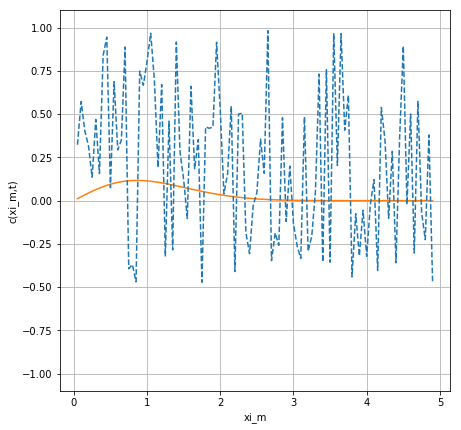

In [44]:
xim = numpy.zeros(N-2)
    
for i in range(N-2):
    xim[i] = (i+1)*delta


# Plot difference versus the time-step size.
pyplot.figure(figsize=(7.0, 7.0))
pyplot.title('')
pyplot.grid(True)
pyplot.xlabel('xi_m')
pyplot.ylabel('c(xi_m,t)')
pyplot.ylim(-1.1,1.1)
pyplot.plot(xim[:-1], data[1][-1][:-1],
              color='C1', linestyle='-', marker='')  #nos valeurs finales en orange
pyplot.plot(xim[:-1], c_i[:-1],
              color='C0', linestyle='--', marker='') #nos valeurs initiales en pointillé bleu
pyplot.axis();

In [47]:
x=0
for i in range(len(data[1][-1])):
    if x<data[1][-1][i]:
        x=data[1][-1][i]
    else :
        x=x

In [48]:
print('La solution maximale en t=10^(-4) est :')
print(x)

La solution maximale en t=10^(-4) est :
0.1168632381155645
